In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-04-06 08:50:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   174MB/s    in 0.5s    

2020-04-06 08:50:56 (174 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:

local_weights='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model=InceptionV3(input_shape=(150,150,3),
                       include_top=False,
                       weights=None)
base_model.load_weights(local_weights)

for layer in base_model.layers:
  layer.trainable=False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [0]:
def load_img(path):
  max_dims=512     #in order to rescale
  img=Image.open(path)  #open the image
  long=max(img.size)            #store the longest axis
  dims=max_dims/long           #512/max_size
  img=img.resize((round(dims*img.size[0]),round(dims*img.size[1])),Image.ANTIALIAS)   #resizes
  img=np.expand_dims(img,axis=0)      #makes it of size(1,n_H,n_W,n_C)
  return img

In [0]:
import tensorflow as tf
def load_process_image(img_path):
  img=load_img(img_path)
  img=tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
last_layer=base_model.get_layer('mixed7')
last_output=last_layer.output

model=ge
Model(base_model.input,last_output)

img=load_process_image('/mystyle.jpg')
output=models.Model(img)
style_features = [style_layer[0] for style_layer in output[:1]]
print(style_features)

TypeError: ignored

In [0]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
#flatten the last_layer to 1d
x=layers.Flatten()(last_output)
#adda a dense with 1024 units to last layers
x=layers.Dense(1024,activation='relu')(x)
#add a dropout rate to avoid overfitting
x=layers.Dropout(0.2)(x)
#add the last layer
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(base_model.input,x)
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


In [0]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

train_gen=ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    shear_range=0.4,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator=train_gen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

test_gen=ImageDataGenerator(rescale=1.0/255.)
test_generator=test_gen.flow_from_directory(
    test_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary'
)

--2020-03-15 04:27:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  42.1MB/s    in 1.6s    

2020-03-15 04:27:34 (42.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=test_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
Epoch 1/20
100/100 - 27s - loss: 0.4906 - acc: 0.7640 - val_loss: 0.5548 - val_acc: 0.8620
Epoch 2/20
Epoch 1/20
100/100 - 17s - loss: 0.4009 - acc: 0.8240 - val_loss: 0.1803 - val_acc: 0.9420
Epoch 3/20
Epoch 1/20
100/100 - 17s - loss: 0.3245 - acc: 0.8555 - val_loss: 0.2020 - val_acc: 0.9540
Epoch 4/20
Epoch 1/20
100/100 - 17s - loss: 0.3209 - acc: 0.8730 - val_loss: 0.2547 - val_acc: 0.9540
Epoch 5/20
Epoch 1/20
100/100 - 17s - loss: 0.3416 - acc: 0.8590 - val_loss: 0.2539 - val_acc: 0.9550
Epoch 6/20
Epoch 1/20
100/100 - 17s - loss: 0.2947 - acc: 0.8775 - val_loss: 0.3501 - val_acc: 0.9470
Epoch 7/20
Epoch 1/20
100/100 - 17s - loss: 0.2936 - acc: 0.8760 - val_loss: 0.2988 - val_acc: 0.9570
Epoch 8/20
Epoch 1/20
100/100 - 17s - loss: 0.2874 - acc: 0.8790 - val_loss: 0.3160 - val_acc: 0.9590
Epoch 9/20
Epoch 1/20
100/100 - 17s - loss: 0.3185 - acc: 0.8730 - val_loss: 0.3557 - val_acc: 0.9540
Epoch 10/20
Epoch 1/20
100/100 - 17s - loss: 0.2804 - acc: 0.8770 - val_loss: 0.31

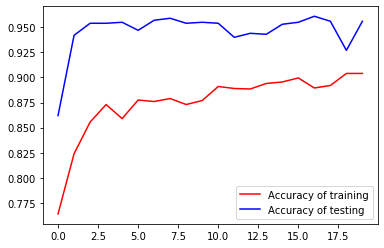

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label='Accuracy of training')
plt.plot(epochs,val_acc,'b',label='Accuracy of testing')
plt.legend(loc=0)
plt.figure()
plt.show()

In [0]:

from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
upload=files.upload()
for fn in upload:
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)/255.0
  x=np.expand_dims(x,axis=0)
  x=np.vstack([x])
  classes=model.predict(x,batch_size=10)
  if(classes[0]>0.5):
    print(fn+" is a dog")
  else:
    print(fn+" is a cat")

Saving images (1).jfif to images (1) (1).jfif
images (1).jfif is a dog
